# Map with STAR to AcolM1 scaffolds and AcolM1.3.gtf

In [ ]:
for fq in /home/bradmain/gambiae/malphigs/raw/*-*fastq.gz
do
echo "/home/bradmain/gambiae/ASE/bin/STAR/source/STAR --genomeDir /home/bradmain/gambiae/malphigs/raw/STAR/Acolgenome --sjdbGTFfile /home/bradmain/gambiae/malphigs/raw/STAR/Acolgenome/Anopheles-coluzzii-Mali-NIH_BASEFEATURES_AcolM1.3.gtf --readFilesIn $fq --readFilesCommand zcat --outSAMtype BAM Unsorted SortedByCoordinate --outFilterMultimapNmax 1 --outSAMunmapped Within --quantMode TranscriptomeSAM GeneCounts --twopassMode Basic --outFileNamePrefix $(basename $fq _L007_R1_001.fastq.gz) --runThreadN 20"
done
#parallel

In [ ]:
#Make ~htseq output
for count in *ReadsPerGene.out.tab
do
grep ACOM $count | awk '{print $1,$4}' > $(basename $count ReadsPerGene.out.tab)stranded_counts.out
done

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library('DESeq2')
# Start with cyp1
# see: http://www-huber.embl.de/users/klaus/Teaching/DESeq2-Analysis.pdf

/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: GenomicRanges

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘BiocGenerics’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


  warnings.warn(x, RR

In [4]:
%%R

directory<-'/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/CYP1'
#use grep to search for the 'treated' part of filename to collect files
sampleFiles<-grep('counts',list.files(directory),value=TRUE)
#print(sampleFiles)
sampleCondition<-c('untreated','untreated','untreated','untreated','untreated','untreated',
                   'treated','treated','treated','treated','treated','treated')
# sampleCondition<-c('untreated','untreated','untreated','untreated','untreated','untreated',
#                    'treated','treated','treated','treated','treated','treated',
#                   'untreated','untreated','untreated','untreated','untreated','untreated',
#                   'treated','treated','treated','treated','treated','treated')
sampleTable<-data.frame(sampleName=sampleFiles, fileName=sampleFiles, condition=sampleCondition)

 
DESeq2Table<-DESeqDataSetFromHTSeqCount(sampleTable=sampleTable, directory=directory, design=~condition)
DESeq2Table
#rowData(DESeq2Table)
#colData(ddsHTSeq)$condition<-factor(colData(ddsHTSeq)$condition, levels=c('untreated','treated'))

class: DESeqDataSet 
dim: 14560 12 
exptData(0):
assays(1): counts
rownames(14560): ACOM024524 ACOM024536 ... ACOM033549 ACOM036007
rowData metadata column names(0):
colnames(12): cyp1-C1-AE_S192stranded_counts.out
  cyp1-C1-YY_S191stranded_counts.out ...
  cyp1-T3-AE_S202stranded_counts.out cyp1-T3-YY_S201stranded_counts.out
colData names(1): condition


In [5]:
%%R
GeneCounts <- counts(DESeq2Table)
idx.nz <- apply(GeneCounts, 1, function(x) { all(x > 0)})
sum(idx.nz)
#How many genes are expressed?

[1] 9189


In [6]:
%%R
DESeq2Table$condition

 [1] untreated untreated untreated untreated untreated untreated treated  
 [8] treated   treated   treated   treated   treated  
Levels: treated untreated


In [7]:
%%R
### make sure to get fold change untreated-treated
con <- as.character(colData(DESeq2Table)$condition)
colData(DESeq2Table)$condition <- factor(con, levels = c("untreated", "treated"))
#### estimate size factors
DESeq2Table <- estimateSizeFactors(DESeq2Table)
sizeFactors(DESeq2Table)

cyp1-C1-AE_S192stranded_counts.out cyp1-C1-YY_S191stranded_counts.out 
                         0.8109549                          0.4686722 
cyp1-C2-AE_S194stranded_counts.out cyp1-C2-YY_S193stranded_counts.out 
                         0.6192919                          1.0749627 
cyp1-C3-AE_S196stranded_counts.out cyp1-C3-YY_S195stranded_counts.out 
                         1.5331044                          1.2203090 
cyp1-T1-AE_S198stranded_counts.out cyp1-T1-YY_S197stranded_counts.out 
                         1.1041007                          1.2981906 
cyp1-T2-AE_S200stranded_counts.out cyp1-T2-YY_S199stranded_counts.out 
                         1.0411697                          1.1301503 
cyp1-T3-AE_S202stranded_counts.out cyp1-T3-YY_S201stranded_counts.out 
                         1.1509535                          1.2075639 


/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Bioconductor version 2.14 (BiocInstaller 1.14.3), ?biocLite for help

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: A newer version of Bioconductor is available for this version of R,
  ?BiocUpgrade for help

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: Biobase

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading requi

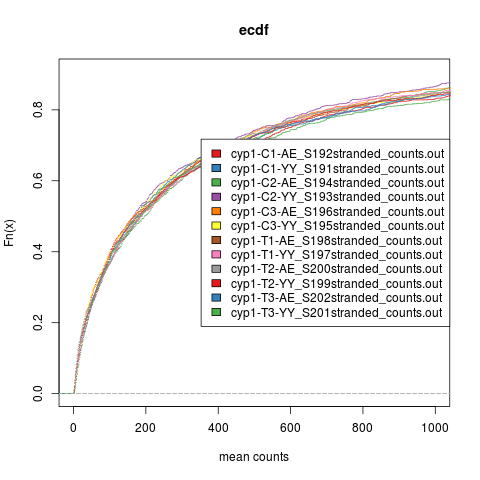

In [8]:
%%R
source("http://bioconductor.org/biocLite.R")
#biocLite("geneplotter")

library("geneplotter")

#library(lattice)
#library(latticeExtra)
#%matplotlib inline

multiecdf( counts(DESeq2Table, normalized = T)[idx.nz ,],xlab="mean counts", xlim=c(0, 1000))
#ecdfplot( counts(DESeq2Table, normalized = T)[idx.nz ,],xlab="mean counts", xlim=c(0, 1000))

In [9]:
%%R
#biocLite("ggplot2")
library("ggplot2")

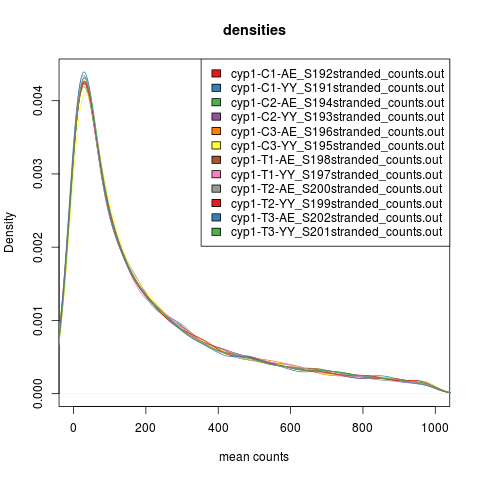

In [10]:
%%R
multidensity( counts(DESeq2Table, normalized = T)[idx.nz ,],xlab="mean counts", xlim=c(0, 1000))

In [11]:
%%R
library(RColorBrewer)
library(gplots)

/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘gplots’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following object is masked from ‘package:IRanges’:

    space


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following object is masked from ‘package:stats’:

    lowess


  warnings.warn(x, RRuntimeWarning)


In [12]:
%%R
### produce rlog-transformed data
rld <- rlogTransformation(DESeq2Table, blind=TRUE)
## create a distance matrix between the samples
pdf("HeatmapPlots.pdf")
distsRL <- dist(t(assay(rld)))
mat <- as.matrix(distsRL)
hmcol <- colorRampPalette(brewer.pal(9, "GnBu"))(100)
heatmap.2(mat, trace="none", col = rev(hmcol), margin=c(13, 13))
dev.off()
    pdf
    2

[1] 2


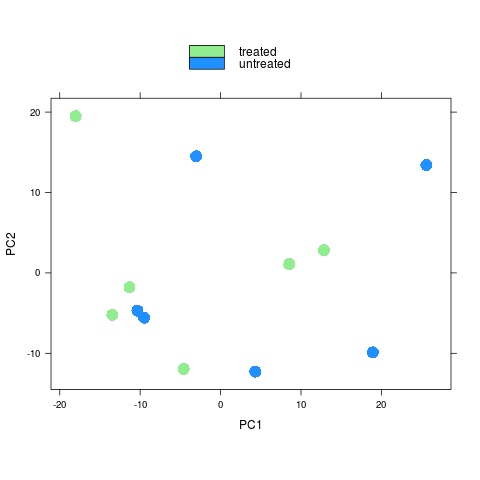

In [13]:
%%R
DESeq2::plotPCA(rld, intgroup=c("condition"))

# No obvious treatment effect. Could it be that the sublethal permethrin treatment was targeted and only impacting a few genes?


/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: gene-wise dispersion estimates

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: mean-dispersion relationship

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: final dispersion estimates

  warnings.warn(x, RRuntimeWarning)


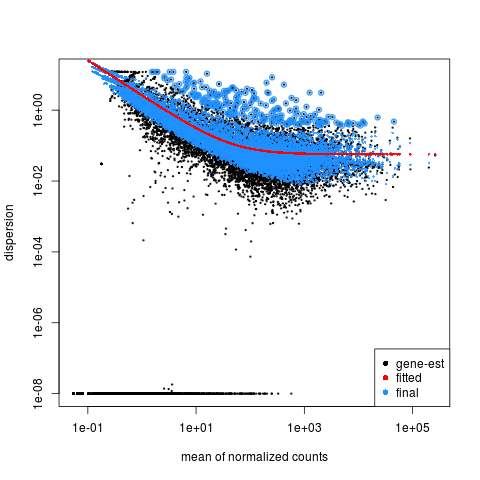

In [14]:
%%R
DESeq2Table <- estimateDispersions(DESeq2Table)
#gene-wise dispersion estimates
#mean-dispersion relationship
#final dispersion estimates
plotDispEsts(DESeq2Table)

In [15]:
%%R
biocLite("fdrtool")
library(fdrtool)

/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: BioC_mirror: http://bioconductor.org

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Using Bioconductor version 2.14 (BiocInstaller 1.14.3), R version
  3.2.5.

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Installing package(s) 'fdrtool'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: trying URL 'http://cran.fhcrc.org/src/contrib/fdrtool_1.2.15.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  length 58387 bytes (57 KB)

  warn


The downloaded source packages are in
	‘/tmp/RtmpCicEFA/downloaded_packages’


In [15]:
%%R 
DESeq2Table <- nbinomWaldTest(DESeq2Table)
DESeq2Res <- results(DESeq2Table, pAdjustMethod = "BH")
write.table(DESeq2Res, file = "cyp1_diffexp")
sigGenes1 <- rownames(subset(DESeq2Res, padj < 0.1))
print(sigGenes1)
### number of siginificant DE-genes
table(DESeq2Res$padj < 0.1)


[1] "ACOM024919" "ACOM030815" "ACOM028919" "ACOM028038"

FALSE  TRUE 
 1351     4 


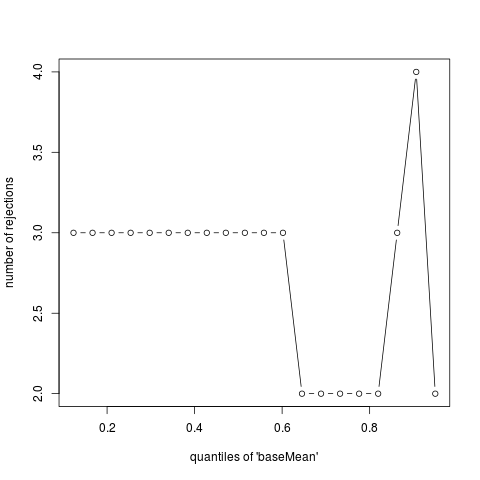

In [95]:
%%R
attr(DESeq2Res,"filterThreshold")

plot(attr(DESeq2Res,"filterNumRej"),type="b", xlab="quantiles of 'baseMean'",
ylab="number of rejections")

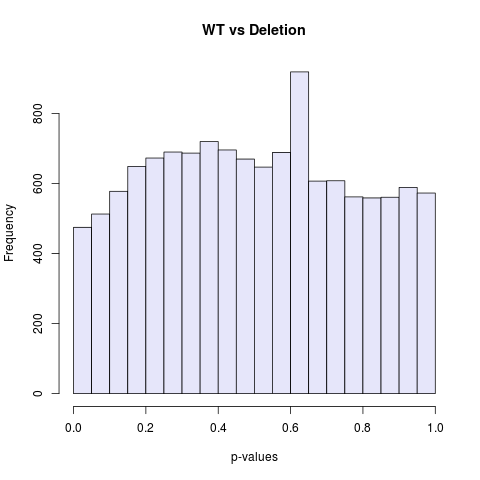

In [96]:
%%R
hist(DESeq2Res$pvalue, col = "lavender",
main = "WT vs Deletion", xlab = "p-values")

# There is no hill shape in the p-values and the sd is >1, so I do not think I need this added correction.

In [1]:
%%R
table(DESeq2Res[,"padj"] < 0.1)

ERROR: Cell magic `%%R` not found.


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr
Step 5... prepare for plotting



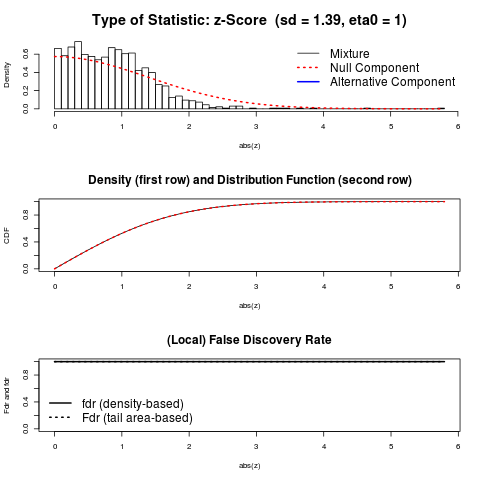

In [101]:
%%R
### remove filtered out genes by independent filtering,
### they have NA adj. pvals
DESeq2Res <- DESeq2Res[ !is.na(DESeq2Res$padj), ]
### remove genes with NA pvals (outliers)
DESeq2Res <- DESeq2Res[ !is.na(DESeq2Res$pvalue), ]
### remove adjsuted pvalues, since we add the fdrtool results later on
### (based on the correct p-values)
DESeq2Res <- DESeq2Res[, -which(names(DESeq2Res) == "padj")]
### use z-scores as input to FDRtool to re-estimate the p-value
#print(DESeq2Res)
FDR.DESeq2Res <- fdrtool(DESeq2Res$stat, statistic= "normal", plot = T)
# ### null model variance
FDR.DESeq2Res$param[1, "sd"]
# sd
# 0.817
# ### add values to the results data frame, also ad new BH- adjusted p-values
DESeq2Res[,"padj"] <- p.adjust(FDR.DESeq2Res$pval, method = "BH")

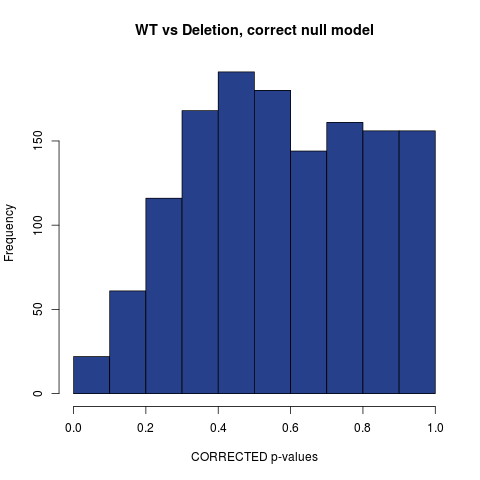

In [102]:
%%R
hist(FDR.DESeq2Res$pval, col = "royalblue4",
main = "WT vs Deletion, correct null model", xlab = "CORRECTED p-values")

In [103]:
%%R
table(DESeq2Res[,"padj"] < 0.1)


FALSE  TRUE 
 1354     1 


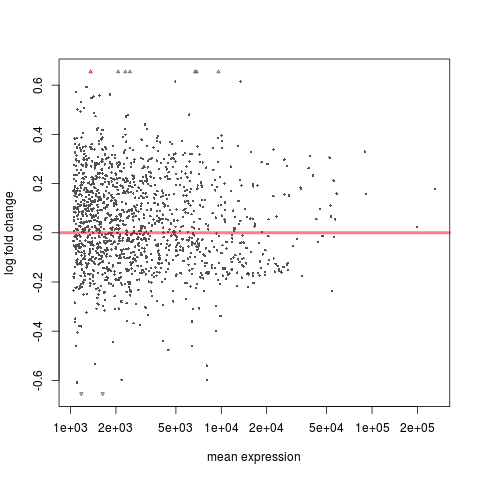

In [105]:
%%R
plotMA(DESeq2Res)

In [107]:
%%R
sigGenes <- rownames(subset(DESeq2Res, padj < 0.1))
print(sigGenes)

[1] "ACOM024919"
